### Variable continuum - generic function

The final expression for the flux of the line considering a variable continuum is 

$$     F_l(net) = \frac{1}{R}\left[ A - \left( \frac{I_l - S_l}{I_c-S_c}\right)\frac{T_c}{T_l}\frac{P}{Q'}  \right] $$

where 

$$  A = \int_{\lambda 1l}^{\lambda 2l} F_c(\lambda)\phi_l(\lambda)d\lambda $$

$$ Q' = \frac{1}{f_c^s} 10^{0.4k_c'(X_c-X_c^s)} \frac{\int_{\lambda 1c}^{\lambda 2c} F_c^s(\lambda)\phi_c(\lambda)d\lambda}{\int_{\lambda 1c}^{\lambda 2c} F_c(\lambda)\phi_c(\lambda)d\lambda} $$

$$ P = \frac{1}{f_l^s}10^{0.4k_l'(X_l-X_l^s)}\int_{\lambda 1l}^{\lambda 2l} F_l^s(\lambda)\phi_l(\lambda)d\lambda $$

$$  R = \frac{1}{g\sqrt{\pi}}\int_{\lambda 1l}^{\lambda 2l} exp\left[-\left(  \frac{\lambda - \lambda_0}{g}\right)^2 \right] \phi_l(\lambda)d\lambda $$

In [1]:
# Libraries needed for v1.5
import os.path
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
def readfile(filename):
    ''' Reads a file.
    Input: Filename.
    Returns: x, y, xmin, xmax, number of points, filename.
    '''
    if os.path.isfile(filename) != True:
        print("File not in this directory!")
    else:
        file = np.loadtxt(filename, unpack=True)
        x = file[0]
        y = file[1]
        xmax = np.amax(x)
        xmin = np.amin(x)
        npts = len(file[0])
        return(x, y, xmin, xmax, npts, filename)

In [3]:
def obsWavelength(x, vel):
    ''' Corrects for systemic velocity.
    Input: Rest wavelength and velocity in km/s.
    Output: Observed wavelengh.
    '''
    c = 299792.458
    z = vel / c
    lambda_obs = x * (1 + z)
    return lambda_obs

In [4]:
def interp(x, y):
    ''' Interpolates a function fitting a spline y = spl(x).
    Input: x, y (arrays).
    Output: Interpolated function.
    '''
    f = InterpolatedUnivariateSpline(x, y)
    return f

In [5]:
def integral(func, a, b):
    ''' Method of InterpolatedUnivariateSpline to calculate the integral of the interpolated function.
    Input: Function to be integrated and interval.
    Output: Result of the integral.
    '''
    I = func.integral(a, b)
    return I

In [7]:
#if __name__ == "__main__": # Uncomment it in the .py final script.
# Data input
Xl = 1.38
print('Line filter air masses (program objects):', Xl)

Xsl = 1.50
print('Line filter air masses (standard objects):', Xsl)

Xc = 1.34
print('Air masses for the continuum filter (program):', Xc)

Xsc = 1.54
print('Air masses for the continuum filter (standard):', Xsc)

kpl = 0.14
print('mag/air mass for line:', kpl)

kpc = 0.23
print('mag/air mass for continuum:', kpc)

fsl = 294.3
print('Raw fluxes of the standard with sky subtracted (line):', fsl)

fsc = 2565.5
print('Raw fluxes of the standard with sky subtracted (continuum):', fsc)

nline = 1
print('Number of lines found in the line filter range, its rest wavelengths and fractional contribution (sum=1.0):', nline)

rfWave = [6563,1]
print('Rest wavelength (Angstroms) of each line as well as its fractional contibution (sum = 1.0):', rfWave)

vsys = 45
print('Systemic velocity of the galaxy:', vsys)

texpl = 2400
print('Exposure times of program frames (line):', texpl)

texpc = 600
print('Exposure times of program frames (continuum):', texpc)

skyl = 67.9
print('Sky background of the program frames in counts/pixel (line):', skyl)

skyc = 123.8
print('Sky background of the program frames in counts/pixel (continuum):', skyc)
    
# Line file
path = '/Users/ziliotto/Documents/GitHub/calibrate_line'
line = readfile(os.path.join(path, '6568.dat'))
print('Line filter file:', line[5])
linex = line[0]
liney = line[1]
xlmax = line[3]
xlmin = line[2]

# Continuum file
continuum = readfile(os.path.join(path, '6092.dat'))
print('Continuum filter file:', continuum[5])
xcmax = continuum[3]
xcmin = continuum[2]
contx = continuum[0]
conty = continuum[1]

# Standard file
standard = readfile(os.path.join(path, 'f34f.dat'))
print('Standard flux file:', standard[5],'\n')
standx = standard[0]
standy = standard[1]
xmin = standard[2]
xmax = standard[3]

Line filter air masses (program objects): 1.38
Line filter air masses (standard objects): 1.5
Air masses for the continuum filter (program): 1.34
Air masses for the continuum filter (standard): 1.54
mag/air mass for line: 0.14
mag/air mass for continuum: 0.23
Raw fluxes of the standard with sky subtracted (line): 294.3
Raw fluxes of the standard with sky subtracted (continuum): 2565.5
Number of lines found in the line filter range, its rest wavelengths and fractional contribution (sum=1.0): 1
Rest wavelength (Angstroms) of each line as well as its fractional contibution (sum = 1.0): [6563, 1]
Systemic velocity of the galaxy: 45
Exposure times of program frames (line): 2400
Exposure times of program frames (continuum): 600
Sky background of the program frames in counts/pixel (line): 67.9
Sky background of the program frames in counts/pixel (continuum): 123.8
Line filter file: /Users/ziliotto/Documents/GitHub/calibrate_line/6568.dat
Continuum filter file: /Users/ziliotto/Documents/GitHub

The next step is to calculate the integrals.

In the integrals, we need to know the flux of the **continuum in function of wavelength** $F_c(\lambda)$. We can define a generic function for now, but our aim is to fit a SED:

In [8]:
def continuum():
    ''' Returns the flux of the continuum in function of wavelength.
    '''
    sed = 'We need to create code to fit a SED.'
    return sed

For the integrals, we also need the filter transmission functions. To obtain these functions, we need to interpolate the data:

In [9]:
# Interpolations
lineInterp = interp(linex,liney)
standInterp = interp(standx,standy)
contInterp = interp(contx,conty)

Just as we need the continuum in function of wavelength, we will need the **transmission in function of wavelength**.

$\phi_l(\lambda)$ will always be the same, since we have only one line filter. However, we need to build a interpolated transmission function $\phi_c(\lambda)$.

Before going to the calculation of the integrals, we can visualize the data.

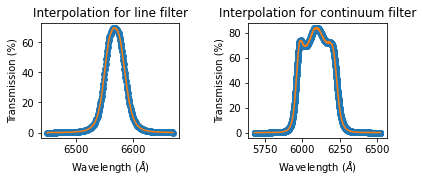

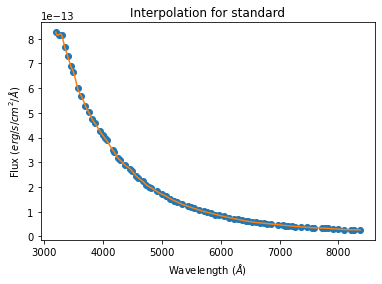

In [10]:
# Plotting the data and interpolations
plt.figure()
plt.subplot(121)
linexNew = np.arange(xlmin,xlmax,0.1)
lineyNew = lineInterp(linexNew)
plt.plot(linex, liney, 'o')
plt.plot(linexNew, lineyNew)
plt.title('Interpolation for line filter')
plt.ylabel('Transmission (%)')
plt.xlabel(r'Wavelength ($\AA$)')
plt.subplot(122)
contxNew = np.arange(xcmin,xcmax,0.1)
contyNew = contInterp(contxNew)
plt.plot(contx, conty, 'o')
plt.plot(contxNew, contyNew)
plt.title('Interpolation for continuum filter')
plt.ylabel('Transmission (%)')
plt.xlabel(r'Wavelength ($\AA$)')
plt.subplots_adjust(top = 0.7,bottom = 0.3,left = 0.10,hspace = 0.9,wspace = 0.5)
plt.show()
standxNew = np.arange(xmin,xmax,0.1)
standyNew = standInterp(standxNew)
plt.plot(standx, standy, 'o')
plt.plot(standxNew, standyNew)
plt.title('Interpolation for standard')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA$)')
plt.xlabel(r'Wavelength ($\AA$)')
plt.show()

Let's start with the simplest integral, A:

$$  A = \int_{\lambda 1l}^{\lambda 2l} F_c(\lambda)\phi_l(\lambda)d\lambda $$

In [11]:
def a(continuum, lineInterp):   # Fc, phiL
    funcA = lambda x: continuum(x) * lineInterp(x)
    A = integral( funcA, xlmin, xlmax )
    return A

We can continue the calculation of the line flux with the Q' parameter (the superscript ' is present because it is different from the Q we were using when the continuum was constant.)

$$ Q' = \frac{1}{f_c^s} 10^{0.4k_c'(X_c-X_c^s)} \frac{\int_{\lambda 1c}^{\lambda 2c} F_c^s(\lambda)\phi_c(\lambda)d\lambda}{\int_{\lambda 1c}^{\lambda 2c} F_c(\lambda)\phi_c(\lambda)d\lambda} $$

In [12]:
def q(standInterp, lineInterp, continuum):
    funcQ1 = lambda x: standInterp(x) * contInterp(x) # phi_c (contInterp)
    funcQ2 = lambda x: continuum(x) * contInterp(x) # phi_c
    Q = (1 / fsc) * 10 ** ( 0.4 * kpc * ( Xc - Xsc ) ) * ( integrate.quad(funcQ1, xcmin, xcmax, epsabs=1.49e-11) / integrate.quad(funcQ2, xcmin, xcmax, epsabs=1.49e-11) )
    return Q

Now, for P:

$$ P = \frac{1}{f_l^s}10^{0.4k_l'(X_l-X_l^s)}\int_{\lambda 1l}^{\lambda 2l} F_l^s(\lambda)\phi_l(\lambda)d\lambda $$

In [13]:
def p(standInterp, lineInterp):
    funcP = lambda x: standInterp(x) * lineInterp(x) # phi_l
    P = (1 / fsl) * 10 ** ( 0.4 * kpl * ( Xl - Xsl ) ) * integral( funcP, xlmin, xlmax )

Finally, for R:

$$  R = \frac{1}{g\sqrt{\pi}}\int_{\lambda 1l}^{\lambda 2l} exp\left[-\left(  \frac{\lambda - \lambda_0}{g}\right)^2 \right] \phi_l(\lambda)d\lambda , $$

where $g = \frac{FWHM}{2ln2}$.

In [14]:
def r(fwhm, vsys):
    g = fwhm / (2 * np.sqrt(np.log(2)))
    cte = 1. / ( np.sqrt( np.pi ) * g )
    waveobs = obsWavelength(6563., vsys)
    funcR = lambda x: lineInterp(x) * np.exp(-(( x - waveobs )/g )**2)
    intR = integrate.quad(funcR, xlmin, xlmax)
    R = intR[0] * cte
    return R

With all the parameters, we can finally calculate the flux of the line:

$$     F_l(net) = \frac{1}{R}\left[ A - \left( \frac{I_l - S_l}{I_c-S_c}\right)\frac{T_c}{T_l}\frac{P}{Q'}  \right] $$

In [15]:
def flnet(R,A,P,Q):
    Fl = print('Fl =', ( 1 / R ), '* (', A, '- ( (I(line) - ', skyl,') / (I(continuum) - ', skyc, ') ) * ( ',texpc*P/(texpl*Q), ') ) ')
    return Fl


In the old version of the code, we considered a constant background, with the form

$$ F_l(cont) = \frac{f_c}{f_c^s}10^{0.4k_c(X_c - X_c^s)}\frac{\int_{\lambda_{1c}}^{\lambda_{2c}}\phi_c(\lambda)F_c^s(\lambda)d\lambda}{\int_{\lambda_{1c}}^{\lambda_{2c}}\phi_c(\lambda)d\lambda}, $$

where $f_c = \frac{Ic - Sc}{Tc}$.

Thus, in this case, the function for the continuum is

In [16]:
def continuum():
    ''' Returns the flux of the continuum.
    '''
    funcQ1 = lambda x: standInterp(x) * contInterp(x)
    funcQ2 = lambda x: contInterp(x)
    fc = (1 / fsc) * 10 ** ( 0.4 * kpc * ( Xc - Xsc ) ) * ( integrate.quad(funcQ1, xcmin, xcmax)[0] / integrate.quad(funcQ2, xcmin, xcmax)[0] )
    return fc

In [17]:
print(continuum())

2.948148797161293e-17


/var/folders/2y/gl9r9z_j2l5gh61r105__rmm0000gn/T/ipykernel_1949/4087017451.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fc = (1 / fsc) * 10 ** ( 0.4 * kpc * ( Xc - Xsc ) ) * ( integrate.quad(funcQ1, xcmin, xcmax)[0] / integrate.quad(funcQ2, xcmin, xcmax)[0] )


In [18]:
type(continuum())

/var/folders/2y/gl9r9z_j2l5gh61r105__rmm0000gn/T/ipykernel_1949/4087017451.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fc = (1 / fsc) * 10 ** ( 0.4 * kpc * ( Xc - Xsc ) ) * ( integrate.quad(funcQ1, xcmin, xcmax)[0] / integrate.quad(funcQ2, xcmin, xcmax)[0] )


float

In [19]:
funcA = lambda x: continuum() * lineInterp(x)
A = integrate.quad( funcA, xlmin, xlmax, epsabs=1.49e-11 )
print(A)

/var/folders/2y/gl9r9z_j2l5gh61r105__rmm0000gn/T/ipykernel_1949/4087017451.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fc = (1 / fsc) * 10 ** ( 0.4 * kpc * ( Xc - Xsc ) ) * ( integrate.quad(funcQ1, xcmin, xcmax)[0] / integrate.quad(funcQ2, xcmin, xcmax)[0] )


(8.786305322607113e-14, 2.1781802926938158e-14)


In [20]:
funcQ1 = lambda x: standInterp(x) * contInterp(x) # phi_c (contInterp)
funcQ2 = lambda x: continuum() * contInterp(x) # phi_c
Q = (1 / fsc) * 10 ** ( 0.4 * kpc * ( Xc - Xsc ) ) * ( integrate.quad(funcQ1, xcmin, xcmax, epsabs=1.49e-11)[0] / integrate.quad(funcQ2, xcmin, xcmax, epsabs=1.49e-11)[0] )
print(Q)

/var/folders/2y/gl9r9z_j2l5gh61r105__rmm0000gn/T/ipykernel_1949/4087017451.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fc = (1 / fsc) * 10 ** ( 0.4 * kpc * ( Xc - Xsc ) ) * ( integrate.quad(funcQ1, xcmin, xcmax)[0] / integrate.quad(funcQ2, xcmin, xcmax)[0] )


0.9987737614836388


In [21]:
funcP = lambda x: standInterp(x) * lineInterp(x) # phi_l
P = (1 / fsl) * 10 ** ( 0.4 * kpl * ( Xl - Xsl ) ) * integrate.quad( funcP, xlmin, xlmax, epsabs=1.49e-11 )[0]
print(P)

5.741249949432777e-13


In [22]:
fwhm = 1
g = fwhm / (2 * np.sqrt(np.log(2)))
cte = 1. / ( np.sqrt( np.pi ) * g )
waveobs = obsWavelength(6563., vsys)
funcR = lambda x: lineInterp(x) * np.exp(-(( x - waveobs )/g )**2)
intR = integrate.quad(funcR, xlmin, xlmax)
R = intR[0] * cte
print(R)

68.13093500351631


In [23]:
Fl = print('Fl =', ( 1 / R ), '* (', A, '- ( (I(line) - ', skyl,') / (I(continuum) - ', skyc, ') ) * ( ',texpc*P/(texpl*Q), ') ) ')
print(Fl)

Fl = 0.01467762037829642 * ( (8.786305322607113e-14, 2.1781802926938158e-14) - ( (I(line) -  67.9 ) / (I(continuum) -  123.8 ) ) * (  1.4370746836862178e-13 ) ) 
None
